<a href="https://colab.research.google.com/github/NamkhangNLe/NamkhangNLe/blob/main/Workshop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Intro to Neural Networks

In [ ]:
#import libraries
from numpy import loadtxt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
file = "https://raw.githubusercontent.com/liquidcarrot/data.pima-indians-diabetes/master/src/raw.csv"

In [ ]:
dataset =  pd.read_csv(file)
dataset.describe()


,pregnancies,plasma glucose concentration,diastolic blood pressure,triceps skinfold thickness,insulin,body mass index,diabetes pedigree function,age,diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


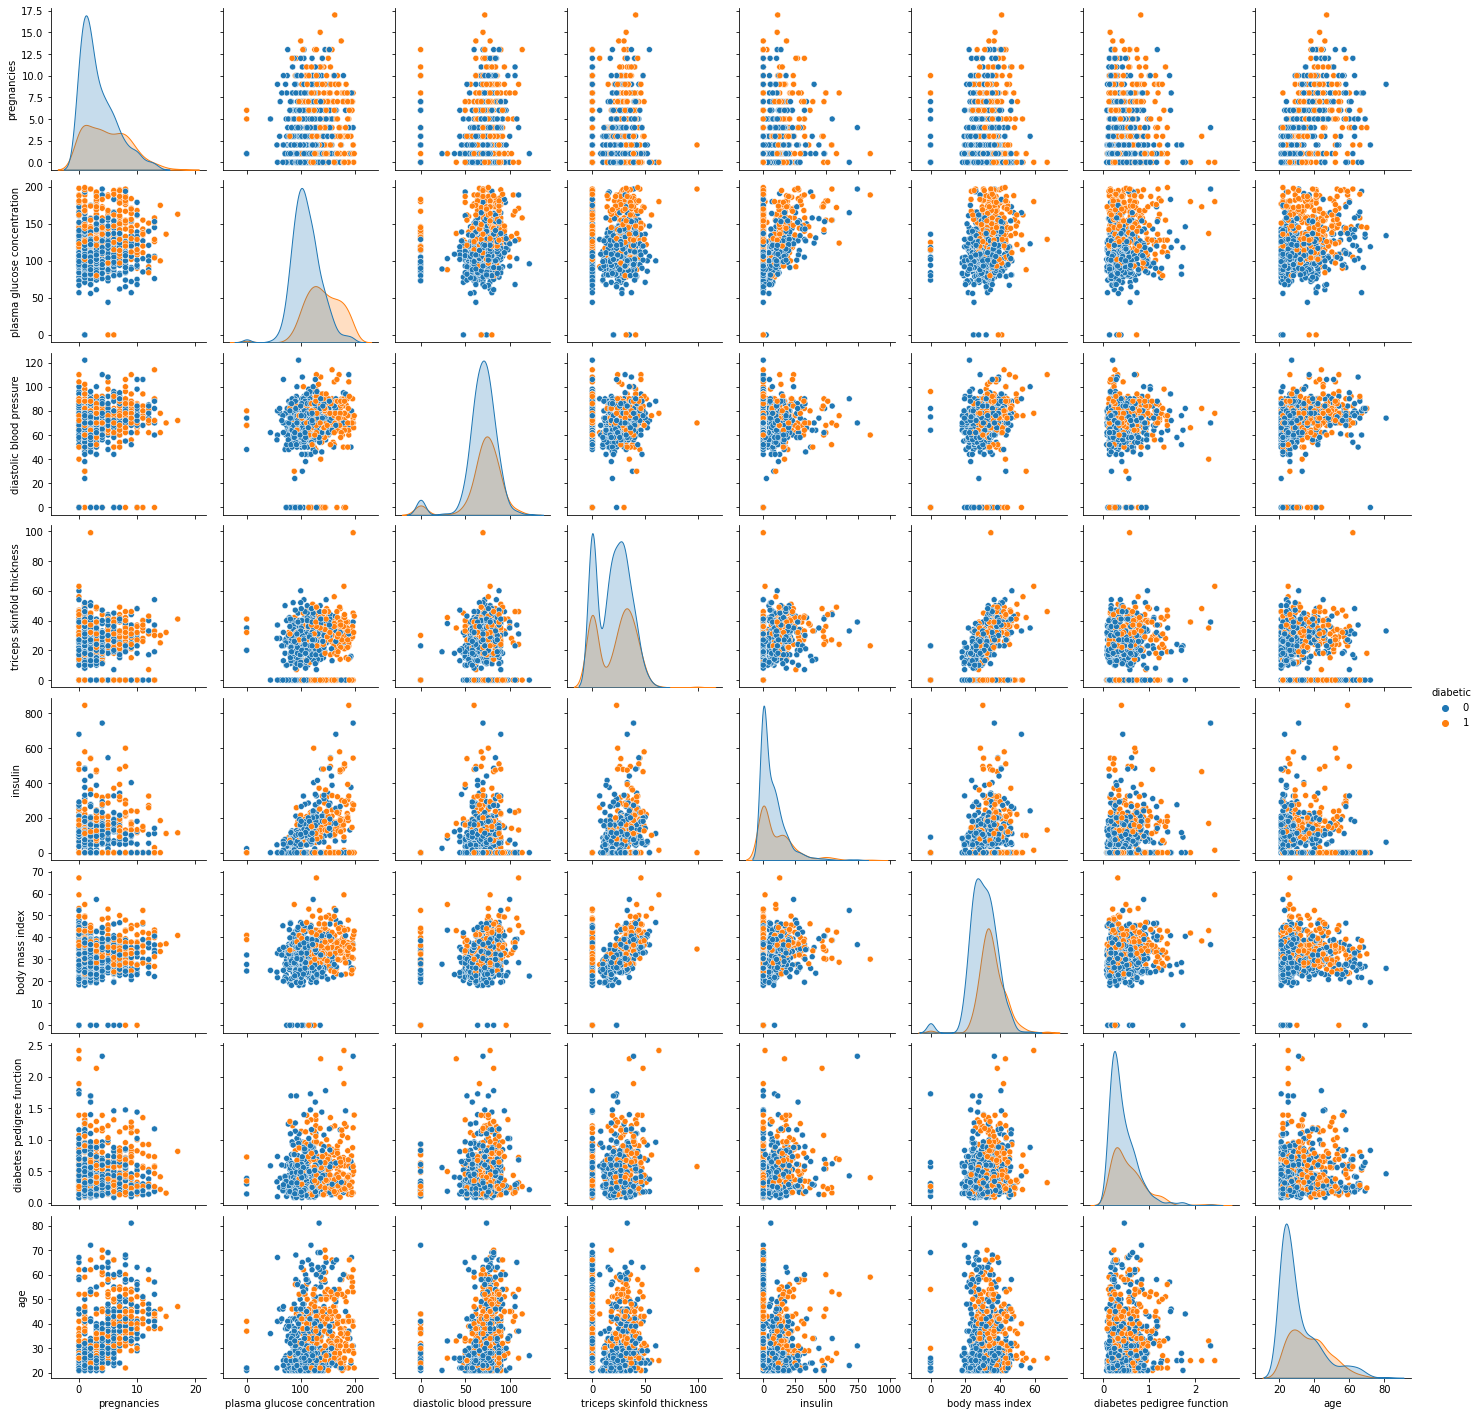

In [ ]:
import seaborn as sns
sns.pairplot(dataset, hue='diabetic')

###Features
Input:
Number of times pregnant

Plasma glucose concentration a 2 hours in an oral glucose tolerance 

Diastolic blood pressure (mm Hg)

Triceps skin fold thickness (mm)

2-Hour serum insulin (mu U/ml)

Body mass index (weight in kg/(height in m)^2)

Diabetes pedigree function

Age (years)

Output: 
Diabetes? (0, 1)



In [ ]:
from sklearn.model_selection import train_test_split
X= dataset.drop(labels= 'diabetic', axis= 1) #select first 8 features as input
y= dataset['diabetic'] #select 9th feature as output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X_train)
print(y_train)

     pregnancies  plasma glucose concentration  ...  diabetes pedigree function  age
40             3                           180  ...                       0.271   26
322            0                           124  ...                       0.254   36
3              1                            89  ...                       0.167   21
554            1                            84  ...                       0.471   28
310            6                            80  ...                       0.313   41
..           ...                           ...  ...                         ...  ...
202            0                           108  ...                       0.787   32
764            2                           122  ...                       0.340   27
573            2                            98  ...                       0.198   22
510           12                            84  ...                       0.297   46
98             6                            93  ...              

In [ ]:
# Define Topology
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 8,12,8,1

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

# 100 rows
# batch size 10


Epoch 1/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.7296
Epoch 2/150
52/52 [==============================] - 0s 956us/step - loss: 0.5364 - accuracy: 0.7237
Epoch 3/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.7237
Epoch 4/150
52/52 [==============================] - 0s 972us/step - loss: 0.5269 - accuracy: 0.7374
Epoch 5/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5341 - accuracy: 0.7374
Epoch 6/150
52/52 [==============================] - 0s 972us/step - loss: 0.5374 - accuracy: 0.7237
Epoch 7/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5264 - accuracy: 0.7257
Epoch 8/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5252 - accuracy: 0.7374
Epoch 9/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5321 - accuracy: 0.7218
Epoch 10/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.7432
Epo

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

8/8 [==============================] - 0s 2ms/step - loss: 0.6395 - accuracy: 0.7244
Accuracy: 72.44


In [ ]:
predictions = model.predict_classes(X_test)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in range(5):
	print((X_test.iloc[i], predictions[i].tolist(), y_test.iloc[i]))

(pregnancies                       2.000
plasma glucose concentration    120.000
diastolic blood pressure         76.000
triceps skinfold thickness       37.000
insulin                         105.000
body mass index                  39.700
diabetes pedigree function        0.215
age                              29.000
Name: 305, dtype: float64, [0], 0)
(pregnancies                       7.000
plasma glucose concentration    102.000
diastolic blood pressure         74.000
triceps skinfold thickness       40.000
insulin                         105.000
body mass index                  37.200
diabetes pedigree function        0.204
age                              45.000
Name: 161, dtype: float64, [0], 0)
(pregnancies                       3.000
plasma glucose concentration    124.000
diastolic blood pressure         80.000
triceps skinfold thickness       33.000
insulin                         130.000
body mass index                  33.200
diabetes pedigree function        0.305
age    